In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, make_scorer

import xgboost as xgb
import os

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


MODELOS A PROBAR CON LAS VARIABLES NORMALES EN PISTA (DECISION TREE, LINEAR REGRESION, RF, XGB, SUPER VECTOR CLASIFIER)
MODELOS A PROBAR CON LAS VARIABLES NORMALES EN GENERAL (DECISION TREE, LINEAR REGRESION, RF, XGB, SUPER VECTOR CLASIFIER)
HACER CROSS VALIDATION Y KFOLD
lo mismo pero quitando peores variables
HAY QUE HABLAR DE QUE SOLO HEMOS COGIDO ESTADISTICAS DE PARTIDO Y DESCARTANDO COSAS COMO DR Y MAS QUE HEMOS DESCARTADO

QUITAR AQUELLOS PARTIDOS DE LOS JUGADORES QUE HAN JUGADO MENOS DE 8 PARTIDOS

LO MISMO PERO AÑADIENDO ELOS

LO MISMO PERO AÑADIENDO MEDIAS DE VARIABLES PARECIDAS

LO MISMO PERO AÑADIENDO METRICAS Y QUE COJA MUCHOS HIPERPARAMETROS

AÑADIENDO SOLO RK


In [2]:
alias_nombres = {
    "Sinner J.": "Jannik Sinner",
    "Zverev A.": "Alexander Zverev",
    "Alcaraz C.": "Carlos Alcaraz",
    "Fritz T.": "Taylor Fritz",
    "Draper J.": "Jack Draper",
    "Djokovic N.": "Novak Djokovic",
    "Ruud C.": "Casper Ruud",
    "De Minaur A.": "Alex De Minaur",
    "Musetti L.": "Lorenzo Musetti",
    "Rune H.": "Holger Rune",
    "Medvedev D.": "Daniil Medvedev",
    "Paul T.": "Tommy Paul",
    "Shelton B.": "Ben Shelton",
    "Fils A.": "Arthur Fils",
    "Dimitrov G.": "Grigor Dimitrov",
    "Tiafoe F.": "Frances Tiafoe",
    "Rublev A.": "Andrey Rublev",
    "Cerundolo F.": "Francisco Cerundolo",
    "Tsitsipas S.": "Stefanos Tsitsipas",
    "Machac T.": "Tomas Machac",
    "Mensik J.": "Jakub Mensik",
    "Humbert U.": "Ugo Humbert",
    "Korda S.": "Sebastian Korda",
    "Khachanov K.": "Karen Khachanov",
    "Popyrin A.": "Alexei Popyrin",
    "Davidovich Fokina A.": "Alejandro Davidovich Fokina",
    "Auger-Aliassime F.": "Felix Auger Aliassime",
    "Shapovalov D.": "Denis Shapovalov",
    "Nakashima B.": "Brandon Nakashima",
    "Berrettini M.": "Matteo Berrettini",
    "Hurkacz H.": "Hubert Hurkacz",
    "Michelsen A.": "Alex Michelsen",
    "Baez S.": "Sebastian Baez",
    "Cobolli F.": "Flavio Cobolli",
    "Griekspoor T.": "Tallon Griekspoor",
    "Mpetshi Perricard G.": "Giovanni Mpetshi Perricard",
    "Arnaldi M.": "Matteo Arnaldi",
    "Lehecka J.": "Jiri Lehecka",
    "Muller A.": "Alexandre Muller",
    "Borges N.": "Nuno Borges",
    "Thompson J.": "Jordan Thompson",
    "Tabilo A.": "Alejandro Tabilo",
    "Monfils G.": "Gael Monfils",
    "Sonego L.": "Lorenzo Sonego",
    "Giron M.": "Marcos Giron",
    "Darderi L.": "Luciano Darderi",
    "Kecmanovic M.": "Miomir Kecmanovic",
    "Goffin D.": "David Goffin",
    "Martinez P.": "Pedro Martinez",
    "Bergs Z.": "Zizou Bergs",
    "Etcheverry T.": "Tomas Martin Etcheverry",
    "Halys Q.": "Quentin Halys",
    "Jarry N.": "Nicolas Jarry",
    "Diallo G.": "Gabriel Diallo",
    "Zhang Z.": "Zhizhen Zhang",
    "Bautista Agut R.": "Roberto Bautista Agut",
    "Fearnley J.": "Jacob Fearnley",
    "Bonzi B.": "Benjamin Bonzi",
    "Carballes Baena R.": "Roberto Carballes Baena",
    "Ugo Carabelli C.": "Camilo Ugo Carabelli",
    "Marozsan F.": "Fabian Marozsan",
    "Nishikori K.": "Kei Nishikori",
    "Comesana F.": "Francisco Comesana",
    "Djere L.": "Laslo Djere",
    "Fonseca J.": "Joao Fonseca",
    "Munar J.": "Jaume Munar",
    "Shang J.": "Juncheng Shang",
    "Bellucci M.": "Mattia Bellucci",
    "Dzumhur D.": "Damir Dzumhur",
    "Tien L.": "Learner Tien",
    "Altmaier D.": "Daniel Altmaier",
    "Medjedovic H.": "Hamad Medjedovic",
    "Yunchaokete B.": "Bu Yunchaokete",
    "Nishioka Y.": "Yoshihito Nishioka",
    "Rinderknech A.": "Arthur Rinderknech",
    "Bublik A.": "Alexander Bublik",
    "Safiullin R.": "Roman Safiullin",
    "Gaston H.": "Hugo Gaston",
    "Vukic A.": "Aleksandar Vukic",
    "Kovacevic A.": "Aleksandar Kovacevic",
    "Oconnell C.": "Christopher Oconnell",
    "Hijikata R.": "Rinky Hijikata",
    "Moutet C.": "Corentin Moutet",
    "Coric B.": "Borna Coric",
    "Van De Zandschulp B.": "Botic Van De Zandschulp",
    "Collignon R.": "Raphael Collignon",
    "Struff J.L.": "Jan Lennard Struff",
    "Walton A.": "Adam Walton",
    "Majchrzak K.": "Kamil Majchrzak",
    "Duckworth J.": "James Duckworth",
    "Norrie C.": "Cameron Norrie",
    "Kopriva V.": "Vit Kopriva",
    "De Jong J.": "Jesper De Jong",
    "Opelka R.": "Reilly Opelka",
    "Nardi L.": "Luca Nardi",
    "Mcdonald M.": "Mackenzie Mcdonald",
    "Shevchenko A.": "Alexander Shevchenko",
    "Carreno Busta P.": "Pablo Carreno Busta",
    "Navone M.": "Mariano Navone",
    "Basavareddy N.": "Nishesh Basavareddy"
}

In [3]:
# DATASETS A USAR

df_stats = pd.read_csv("stats_Hard_transf_con_Elo.csv")
#est lo normalizaremos si hace falta

df_partidos = pd.read_csv("dataset_3hard.csv", delimiter=';')

df_partidos_masde10 = pd.read_csv("dataset_3hard_10partidos.csv", delimiter=';')


Transformacion a dataset para entrenamiento con merge de los jugadores

In [4]:
# Limpiar nombres
df_stats['Player'] = df_stats['Player'].str.strip()
df_partidos['Local'] = df_partidos['Local'].str.strip()
df_partidos['Visitante'] = df_partidos['Visitante'].str.strip()


# Reemplazar nombres en el dataset de partidos
df_partidos['Local'] = df_partidos['Local'].replace(alias_nombres)
df_partidos['Visitante'] = df_partidos['Visitante'].replace(alias_nombres)

# === Paso 3: Merge jugador local ===
df_local = df_partidos.merge(df_stats, how='left', left_on='Local', right_on='Player', suffixes=('', '_local'))
df_local = df_local.drop(columns=['Player'])

local_stat_cols = [col for col in df_local.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L']]
df_local = df_local.rename(columns={col: f'1_{col}' for col in local_stat_cols})

# === Paso 4: Merge jugador visitante ===
df_final = df_local.merge(df_stats, how='left', left_on='Visitante', right_on='Player', suffixes=('', '_visit'))
df_final = df_final.drop(columns=['Player'])

visit_stat_cols = [col for col in df_final.columns if col not in ['Surface', 'Local', 'Visitante', 'W_OR_L'] and not col.startswith('1_')]
df_final = df_final.rename(columns={col: f'2_{col}' for col in visit_stat_cols})

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [5]:
# === Paso 5: Reordenar columnas respetando orden original del CSV
stats_cols = [col for col in df_stats.columns if col not in ['Player','M','BPChnc','Elo', 'hElo',]]
columnas_finales = ['Surface', 'Local', 'Visitante', 'W_OR_L'] + \
                   [f'1_{col}' for col in stats_cols if f'1_{col}' in df_final.columns] + \
                   [f'2_{col}' for col in stats_cols if f'2_{col}' in df_final.columns]

df_final = df_final[columnas_finales]

# === Paso 6: Guardar el dataset final
df_final.to_csv("Train/dataset_modelo2_variablesnormalesrk_train.csv", index=False)
print("Dataset preparado para entrenamiento de modelo.")

Dataset preparado para entrenamiento de modelo.


In [6]:
# === Cargar dataset generado ===
df = pd.read_csv("Train/dataset_modelo2_variablesnormalesrk_train.csv")

# === Separar variables y objetivo ===
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df['W_OR_L']


MODELO DECISION TREE

Resultados del modelo Árbol de Decisión
Accuracy: 0.5926
F1 Score: 0.6333

Clasificación:
               precision    recall  f1-score   support

           0       0.45      0.68      0.54        19
           1       0.76      0.54      0.63        35

    accuracy                           0.59        54
   macro avg       0.60      0.61      0.59        54
weighted avg       0.65      0.59      0.60        54


Matriz de confusión:
 [[13  6]
 [16 19]]


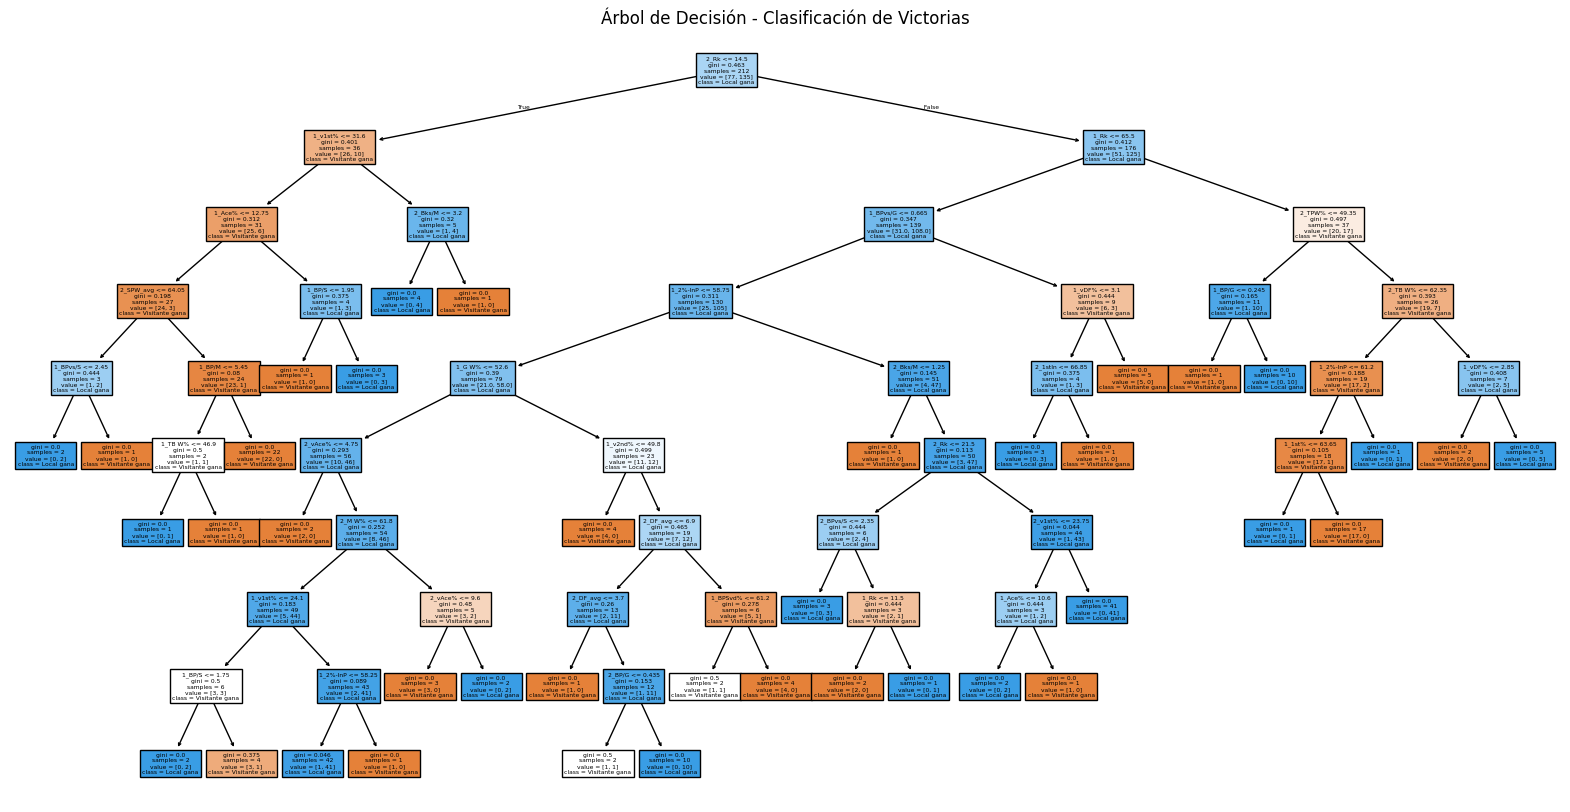

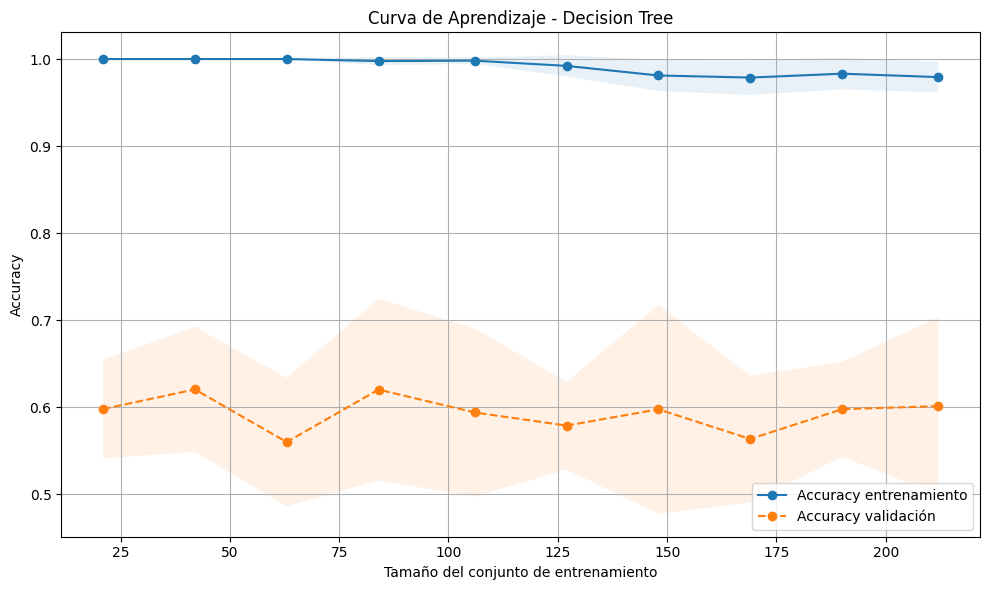

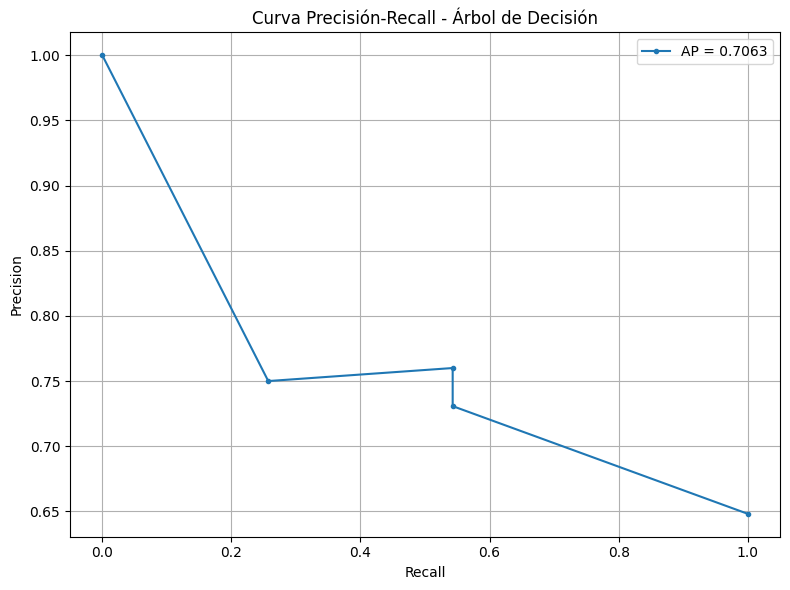

In [7]:
# === Cargar dataset generado ===
df_decision_tree = pd.read_csv("Train/dataset_modelo2_variablesnormalesrk_train.csv")

# === Separar variables y objetivo ===
X = df_decision_tree.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df_decision_tree['W_OR_L']

# === División en train y test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# === Entrenar modelo de árbol de decisión ===
dt = DecisionTreeClassifier(max_depth=9, random_state=42)
dt.fit(X_train, y_train)

# === Evaluar modelo ===
y_pred = dt.predict(X_test)
print("Resultados del modelo Árbol de Decisión")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("\nClasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

# === Visualizar árbol ===
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Visitante gana', 'Local gana'], filled=True)
plt.title("Árbol de Decisión - Clasificación de Victorias")
plt.show()

# === CURVA DE APRENDIZAJE ===
train_sizes, train_scores, val_scores = learning_curve(
    dt, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === CURVA PRECISIÓN-RECALL ===
y_proba = dt.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP = {avg_precision:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall - Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
dt_acc = cross_val_score(dt, X, y, cv=cv, scoring='accuracy')
dt_f1 = cross_val_score(dt, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 Árbol de Decisión")
print(f"   Accuracy promedio: {dt_acc.mean():.4f} ± {dt_acc.std():.4f}")
print(f"   F1 Score promedio: {dt_f1.mean():.4f} ± {dt_f1.std():.4f}")

🔹 Árbol de Decisión
   Accuracy promedio: 0.6167 ± 0.0388
   F1 Score promedio: 0.6839 ± 0.0192


MODELO REGRESION

Resultados del modelo Logistic Regression (con normalización):
Accuracy: 0.7407
F1 Score: 0.7407

=== Clasificación ===
              precision    recall  f1-score   support

           0     0.6316    0.6316    0.6316        19
           1     0.8000    0.8000    0.8000        35

    accuracy                         0.7407        54
   macro avg     0.7158    0.7158    0.7158        54
weighted avg     0.7407    0.7407    0.7407        54

=== Matriz de confusión ===
[[12  7]
 [ 7 28]]


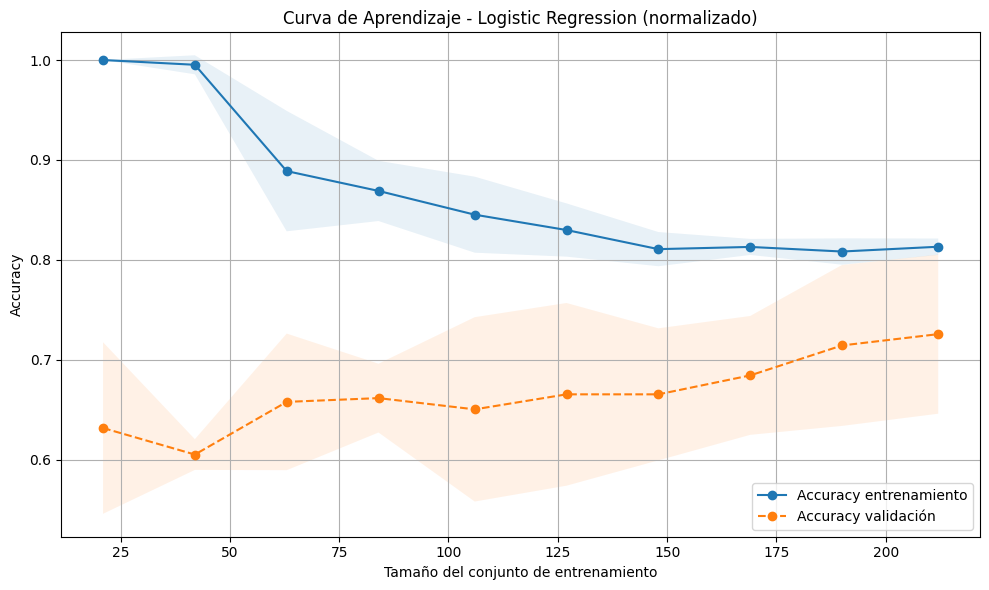

In [9]:
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df['W_OR_L']

# === División train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Pipeline con normalización y regresión logística ===
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000, random_state=42)
)

# === Entrenamiento ===
lr_pipeline.fit(X_train, y_train)

# === Predicciones ===
y_pred = lr_pipeline.predict(X_test)

# === Evaluaciones ===
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo Logistic Regression (con normalización):")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred))

# === Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    lr_pipeline, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje - Logistic Regression (normalizado)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
lr_acc = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy')
lr_f1 = cross_val_score(lr_pipeline, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 Regresión Logística")
print(f"   Accuracy promedio: {lr_acc.mean():.4f} ± {lr_acc.std():.4f}")
print(f"   F1 Score promedio: {lr_f1.mean():.4f} ± {lr_f1.std():.4f}")

🔹 Regresión Logística
   Accuracy promedio: 0.6805 ± 0.0605
   F1 Score promedio: 0.7642 ± 0.0465


Resultados del modelo Random Forest
Accuracy: 0.6667
F1 Score: 0.6561

=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5333    0.4211    0.4706        19
           1     0.7179    0.8000    0.7568        35

    accuracy                         0.6667        54
   macro avg     0.6256    0.6105    0.6137        54
weighted avg     0.6530    0.6667    0.6561        54

=== Matriz de confusión ===
[[ 8 11]
 [ 7 28]] 



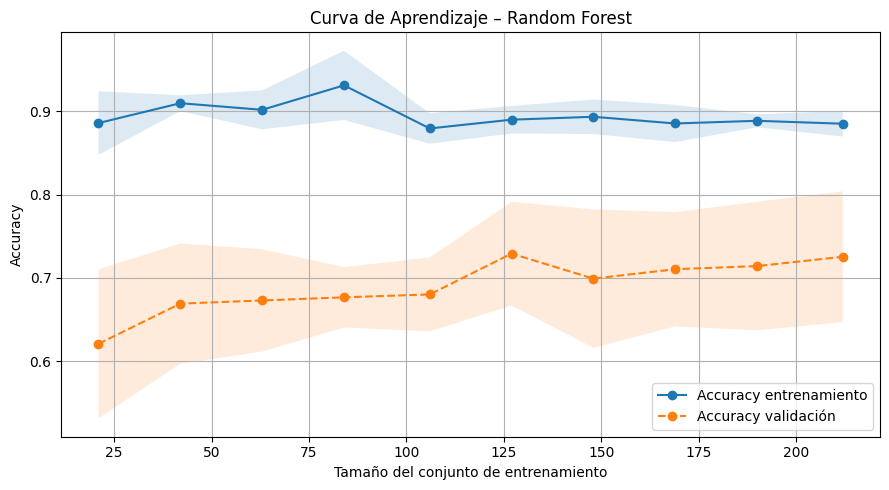

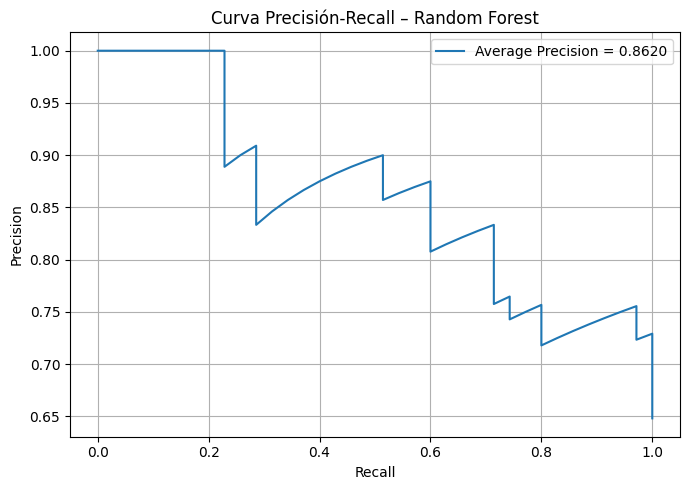


=== Variables más importantes ===
2_Rk         0.0703
1_Rk         0.0452
2_Bkn/S      0.0342
1_vAce%      0.0315
2_TPW%       0.0276
2_vAce%      0.0268
2_RPW_avg    0.0260
1_BPConv%    0.0247
2_G W%       0.0234
2_Bks/M      0.0232
1_M W%       0.0228
2_v2nd%      0.0219
2_Hld%       0.0215
1_BPvs/M     0.0205
1_2%-InP     0.0203
1_G W%       0.0201
1_BPvs/G     0.0187
1_TPW%       0.0185
2_2nd%       0.0173
1_v1st%      0.0170
2_BPSvd%     0.0170
1_vDF%       0.0160
2_M W%       0.0158
2_2%-InP     0.0157
1_BPSvd%     0.0157
2_BPvs/S     0.0154
2_BPvs/G     0.0145
1_Ace%       0.0144
2_SPW_avg    0.0143
2_BPvs/M     0.0142
2_BPConv%    0.0142
1_RPW_avg    0.0140
1_BPvs/S     0.0139
2_BP/M       0.0137
1_2nd%       0.0137
2_1stIn      0.0130
1_TB W%      0.0129
1_Bks/M      0.0126
2_Brk%       0.0123
1_Brk%       0.0117
1_Hld%       0.0115
2_DF_avg     0.0114
1_SPW_avg    0.0114
2_1st%       0.0114
1_Bkn/S      0.0112
2_TB W%      0.0111
1_1stIn      0.0104
2_v1st%      0.0099
1_v2n

In [13]:
# === 2. Separar variables y objetivo ===
X = df.drop(columns=['Surface', 'Local', 'Visitante', 'W_OR_L'])
y = df['W_OR_L']

# === 3. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# === 4. Entrenar Random Forest ===
rf = RandomForestClassifier(
    n_estimators=150,         # Menos árboles = menor complejidad (ajustable)
    max_depth=6,              # Limita la profundidad del árbol → evita ramas muy especializadas
    min_samples_split=10,     # Al menos 10 ejemplos para dividir un nodo
    min_samples_leaf=5,       # Al menos 5 ejemplos por hoja → evita nodos frágiles
    max_features='sqrt',      # Usa solo sqrt(n_features) en cada split (reduce varianza)
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# === 5. Evaluación en test ===
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo Random Forest")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}\n")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred), "\n")

# === 6. Curva de aprendizaje (learning curve) ===
train_sizes, train_scores, val_scores = learning_curve(
    rf, X, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1,
    random_state=42
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(9, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.15)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Curva Precisión-Recall ===
y_proba = rf.predict_proba(X_test)[:, 1]          # prob. clase positiva
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Importancia de variables (opcional) ===
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== Variables más importantes ===")
print(importances.round(4))

In [12]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_acc = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')
rf_f1 = cross_val_score(rf, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 Random Forest")
print(f"   Accuracy promedio: {rf_acc.mean():.4f} ± {rf_acc.std():.4f}")
print(f"   F1 Score promedio: {rf_f1.mean():.4f} ± {rf_f1.std():.4f}")

🔹 Random Forest
   Accuracy promedio: 0.6957 ± 0.0463
   F1 Score promedio: 0.7831 ± 0.0312


Resultados del modelo XGBoost
Accuracy: 0.6296
F1 Score: 0.6375
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.4800    0.6316    0.5455        19
           1     0.7586    0.6286    0.6875        35

    accuracy                         0.6296        54
   macro avg     0.6193    0.6301    0.6165        54
weighted avg     0.6606    0.6296    0.6375        54

=== Matriz de confusión ===
[[12  7]
 [13 22]] 



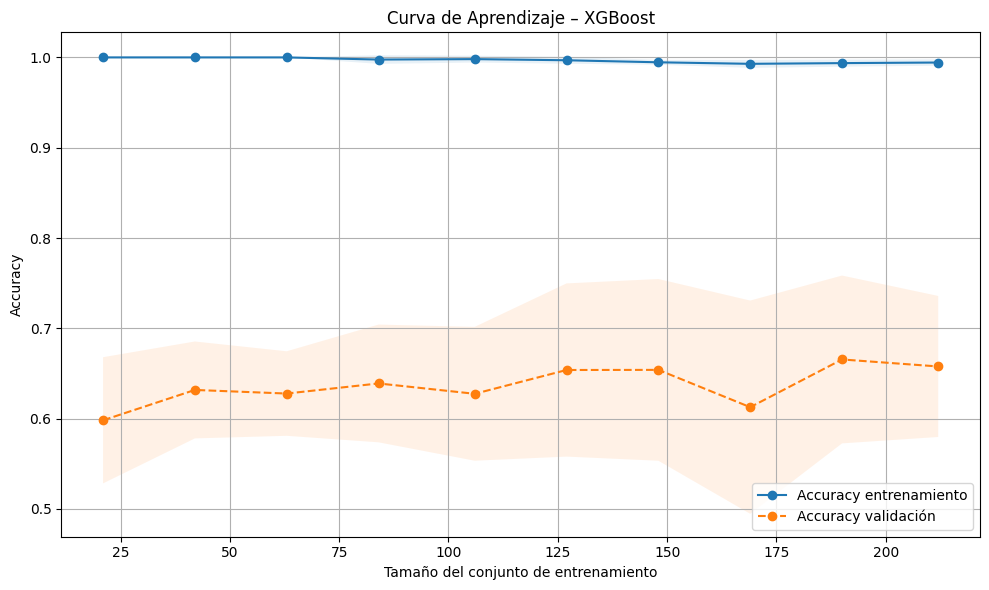

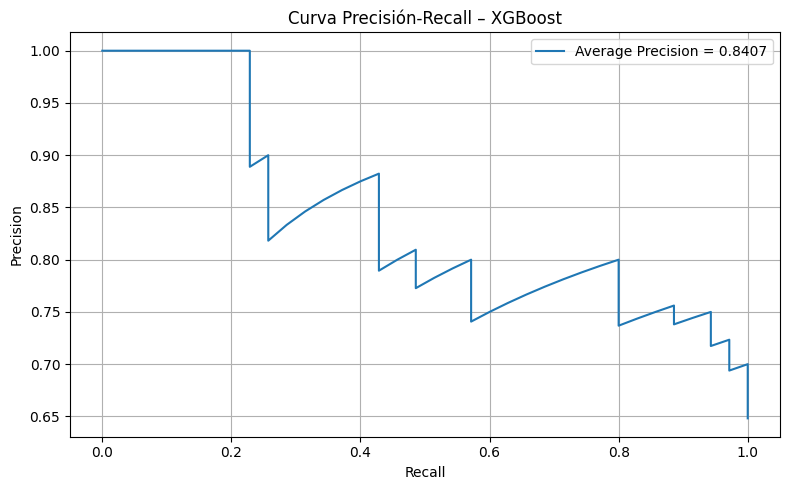

In [14]:
# === 3. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# === 4. Entrenar modelo XGBoost ===
xgb = XGBClassifier(
    n_estimators=150,
    random_state=42
)
xgb.fit(X_train, y_train)

# === 5. Evaluación en test ===
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo XGBoost")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred), "\n")

# === 6. Curva de aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    xgb, X, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Curva precisión-recall ===
y_proba = xgb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
xgb_acc = cross_val_score(xgb, X, y, cv=cv, scoring='accuracy')
xgb_f1 = cross_val_score(xgb, X, y, cv=cv, scoring=make_scorer(f1_score))

print("🔹 XGBoost")
print(f"   Accuracy promedio: {xgb_acc.mean():.4f} ± {xgb_acc.std():.4f}")
print(f"   F1 Score promedio: {xgb_f1.mean():.4f} ± {xgb_f1.std():.4f}")

🔹 XGBoost
   Accuracy promedio: 0.6391 ± 0.0691
   F1 Score promedio: 0.7257 ± 0.0679


Resultados del modelo SVM (normalizado + balanceado)
Accuracy: 0.6852
F1 Score: 0.6914
=== Clasificación ===
              precision    recall  f1-score   support

           0     0.5417    0.6842    0.6047        19
           1     0.8000    0.6857    0.7385        35

    accuracy                         0.6852        54
   macro avg     0.6708    0.6850    0.6716        54
weighted avg     0.7091    0.6852    0.6914        54

=== Matriz de confusión ===
[[13  6]
 [11 24]] 



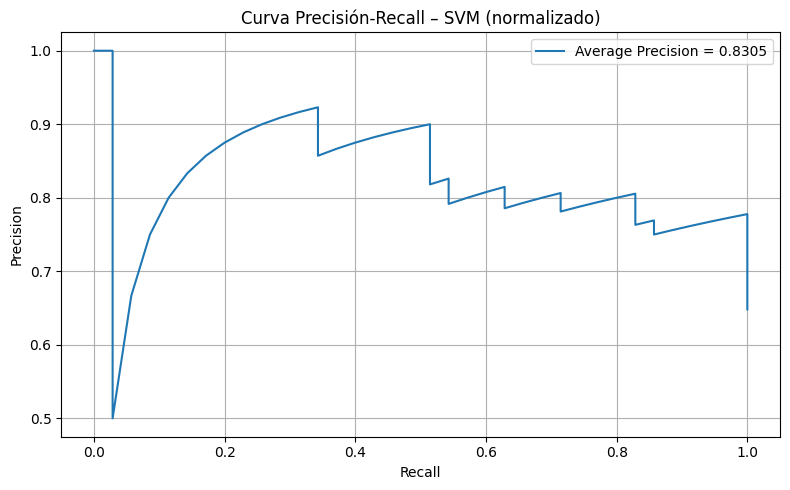

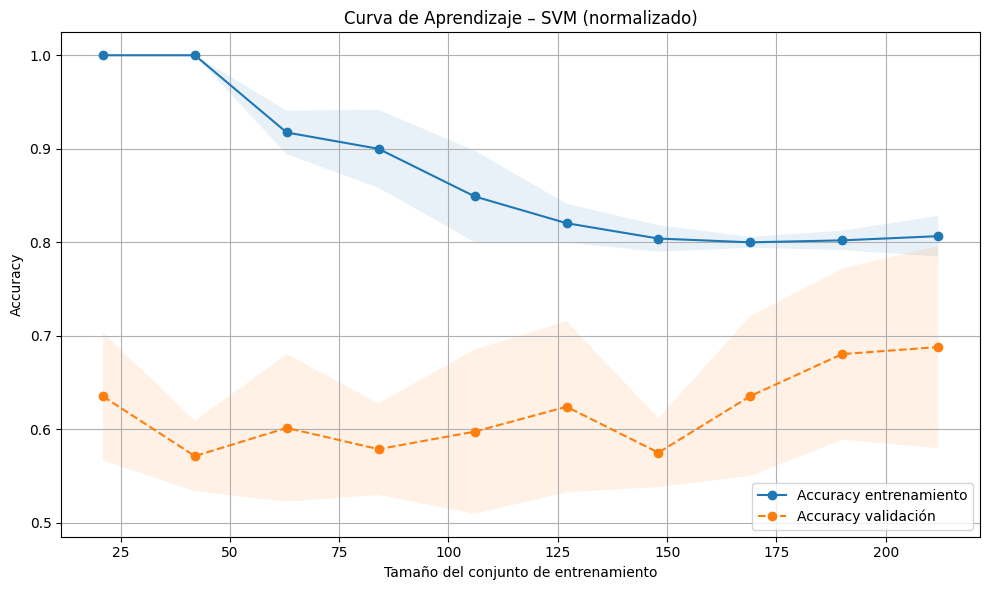

In [16]:
# === 2. División en train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 3. Normalización ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

# === 4. Entrenar SVM con balanceo y kernel lineal ===
model = SVC(kernel='linear', C=1.0, class_weight='balanced', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)

# === 5. Evaluar ===
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Resultados del modelo SVM (normalizado + balanceado)")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("=== Clasificación ===")
print(classification_report(y_test, y_pred, digits=4))
print("=== Matriz de confusión ===")
print(confusion_matrix(y_test, y_pred), "\n")

# === 6. Curva Precisión-Recall ===
y_proba = model.predict_proba(X_test_scaled)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, label=f'Average Precision = {ap:.4f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precisión-Recall – SVM (normalizado)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 7. Curva de Aprendizaje ===
train_sizes, train_scores, val_scores = learning_curve(
    model, X_scaled, y,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Accuracy entrenamiento")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, val_mean, 'o--', label="Accuracy validación")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")
plt.title("Curva de Aprendizaje – SVM (normalizado)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# === 2. Definir modelo con pipeline (normalización + SVM balanceado) ===
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
)

# === 3. Validación cruzada (cv=5 estratificada) ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === 4. Calcular accuracy y F1-score con cross_val_score ===
acc_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(svm_pipeline, X, y, cv=cv, scoring=make_scorer(f1_score))

# === 5. Mostrar resultados ===
print("Validación cruzada (SVM con normalización y class_weight='balanced')")
print(f"Accuracy promedio: {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
print(f"F1 Score promedio: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

Validación cruzada (SVM con normalización y class_weight='balanced')
Accuracy promedio: 0.6765 ± 0.0643
F1 Score promedio: 0.7367 ± 0.0576
